# Decision Trees (DTs) 
are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Dataset in use: 
-- Iris plants dataset from scikit-learn

About dataset:
-- The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken from Fisher’s paper. This is perhaps the best known database to be found in the pattern recognition literature. Fisher’s paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
# Load the dataset
X, y = load_iris(return_X_y=True)

In [3]:
# Convert to DataFrame (just to see what we have in the dataset)
# It is NOT needed for Decision Tree usage

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column
df['species'] = iris.target

# Map the target values to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Make an instance of the model

from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth = 5)

# Train the model on the training data
DT_model.fit(X_train, y_train);

# Important Parameters of `DecisionTreeClassifier`

1. **max_depth**
   - **Description**: This parameter limits the depth of the tree. A smaller depth reduces model complexity, which can prevent overfitting, while a deeper tree allows the model to capture more detail but risks overfitting.
   - **Typical Usage**: Try various values (e.g., `max_depth=3`, `max_depth=5`) and observe how the model performs.

2. **max_features**
   - **Description**: Controls the number of features to consider when looking for the best split. You can limit the number of features to be considered at each split, which might help to reduce overfitting. Algorithm will *randomly* pick corresponding number of features and choose the best split among those.
   - **Typical Usage**: Set it to `'sqrt'`, `'log2'`, an integer (e.g., `max_features=4`), or a fraction (e.g., `max_features=0.5`).


3. **min_samples_split**
   - **Description**: Specifies the minimum number of samples required to split an internal node. Increasing this number can prevent the tree from creating splits that involve small subsets of data, thus simplifying the model.
   - **Typical Usage**: Set it higher (e.g., `min_samples_split=10`) to prevent overfitting or leave it at the default (`2`).

4. **min_samples_leaf**
   - **Description**: This is the minimum number of samples that a leaf node must have. Setting this value higher forces the model to make larger leaves, reducing overfitting.
   - **Typical Usage**: Values like `min_samples_leaf=5` or `min_samples_leaf=10` can simplify the tree and make the model more general.

5. **criterion**
   - **Description**: Specifies the function to measure the quality of a split. The options are `'gini'` for Gini impurity and `'entropy'` for information gain. These are used to decide how to split nodes.
   - **Typical Usage**: The default is `'gini'`, but you can try `'entropy'` to see if it improves model performance.

6. **max_leaf_nodes**
   - **Description**: Limits the number of leaf nodes in the tree. Limiting this can simplify the tree and avoid overfitting.
   - **Typical Usage**: For example, you can set it to `max_leaf_nodes=10` or `20`.

7. **min_weight_fraction_leaf**
   - **Description**: This sets the minimum weighted fraction of the input samples required to be at a leaf node. It ensures that leaf nodes are not too small.
   - **Typical Usage**: Set it between 0 and 1 to control the minimum weight for leaf nodes.

8. **class_weight**
   - **Description**: Assign weights to different classes in case of imbalanced data. If you have imbalanced classes, setting this parameter can help the model focus on minority classes.
   - **Typical Usage**: Use `'balanced'` or pass a dictionary `{class_label: weight}` to handle class imbalance.

9. **random_state**
    - **Description**: Controls the randomness of the algorithm, ensuring reproducibility of results when set to an integer.
    - **Typical Usage**: Set it to an integer (e.g., `random_state=42`) for reproducibility.


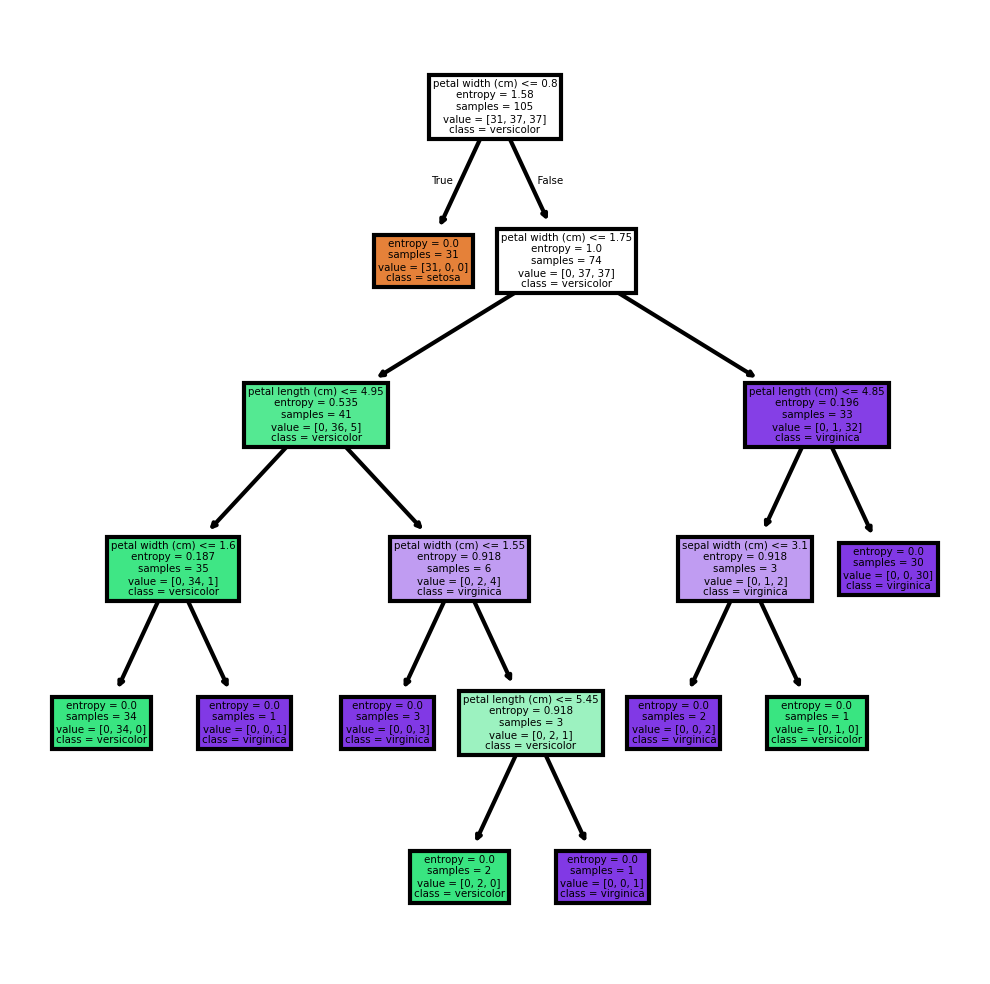

In [8]:
# Plot the Decision Tree

from sklearn import tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(DT_model,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [9]:
DT_model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [10]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [11]:
# Evaluate the model on the test data
accuracy = DT_model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 1.00
